<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MXNet-NDArrays" data-toc-modified-id="MXNet-NDArrays-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MXNet NDArrays</a></span><ul class="toc-item"><li><span><a href="#Fundamental" data-toc-modified-id="Fundamental-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fundamental</a></span></li><li><span><a href="#MXNet-vs-Numpy" data-toc-modified-id="MXNet-vs-Numpy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>MXNet vs Numpy</a></span></li><li><span><a href="#Common-Operations" data-toc-modified-id="Common-Operations-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Common Operations</a></span></li></ul></li><li><span><a href="#Gluon-Blocks" data-toc-modified-id="Gluon-Blocks-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gluon Blocks</a></span><ul class="toc-item"><li><span><a href="#Fundamental" data-toc-modified-id="Fundamental-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fundamental</a></span><ul class="toc-item"><li><span><a href="#Convolutional-2D" data-toc-modified-id="Convolutional-2D-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Convolutional 2D</a></span></li><li><span><a href="#Max-Pooling" data-toc-modified-id="Max-Pooling-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Max Pooling</a></span></li><li><span><a href="#Dense-Layer" data-toc-modified-id="Dense-Layer-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Dense Layer</a></span></li></ul></li><li><span><a href="#Initialization" data-toc-modified-id="Initialization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Sequential-Gluon-Blocks" data-toc-modified-id="Sequential-Gluon-Blocks-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sequential Gluon Blocks</a></span></li><li><span><a href="#Custom-Gluon-Blocks" data-toc-modified-id="Custom-Gluon-Blocks-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Custom Gluon Blocks</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Visualization</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Metrics" data-toc-modified-id="Metrics-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Metrics</a></span></li><li><span><a href="#Losses" data-toc-modified-id="Losses-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Losses</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Key Concepts
- Understand the mathematics behind NDArray
- Understand when to use different Gluon blocks including convolution, dense layers, and pooling
- Compose Gluon blocks into complete models
- Understand the difference between metrics and loss

## MXNet NDArrays

### Fundamental

N-dimensional array or Tensor: used to represent input, output, intermediate feature maps, and operator parameters (trainable parameters).

- Zero-dimensional array: scalar. Not exist in MXNet, represented by 1D array instead
- One-dimensional array: vector, used to represent bias or one-hot encoded features
- Two-dimensional array: matrix, used to store grayscale inputs or weights
- Three-dimensional array: store intermediate feature maps or RGB image
- Four-dimensional array: store a batch of RGB images.

**Knowledge Check**

Select all of the options that are true.
- [ ] A batch of colour images is represented as a 4D NDArray.
- [ ] A colour image is commonly represented as a 2D NDArray.
- [ ] A 2D NDArray is commonly called a 'vector'.
- [ ] A zero-dimensional NDArray is called a 'scalar'.

Operator parameters in neural network can be vectorized as follows:

<img src="assets/module4/operator-parameters.png" width="500">

The order of pixels of data dimension images impact the performance of the convolution operations. This is because the data is stored linearly in memory.

Therefore, MXNet is a **channel first framework** so that the performance and GPU caching are more efficient, meaning the tensor dimension would be: batch, channel, height, width (NCHW)

<img src="assets/module4/in-memory-representation.png" width="500">

### MXNet vs Numpy

In [1]:
from mxnet import nd
import mxnet as mx
import numpy as np

NDArray from tuples

In [2]:
nd.array(((1,2,3), (5,6,7)))


[[1. 2. 3.]
 [5. 6. 7.]]
<NDArray 2x3 @cpu(0)>

Ones

In [3]:
x = nd.ones((2,3))
x


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

Randomly sampled

In [4]:
y = nd.random_uniform(low = -1 , high = 1, shape = (2,3))
y


[[0.09762704 0.18568921 0.43037868]
 [0.6885315  0.20552671 0.71589124]]
<NDArray 2x3 @cpu(0)>

NDArray Metadata
- shape: row x column
- size: no. of element (row times column)
- dtype: data types
- context: where the array is stored

In [5]:
x.shape, x.size, x.dtype, x.context

((2, 3), 6, numpy.float32, cpu(0))

Data type

In [6]:
y.astype(np.float16)


[[0.09766 0.1857  0.4304 ]
 [0.6885  0.2056  0.716  ]]
<NDArray 2x3 @cpu(0)>

Context: only in MXNet not in numpy array

In [7]:
nd.ones((2,3), ctx = mx.cpu())


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

**Knowledge Check**

Which of the following NDArray operations are valid?
- [ ] `mx.nd.ones(shape=(1000,), ctx=mx.gpu(1))`
- [ ] `mx.nd.ones(shape=(1000,), context=mx.gpu(0))`
- [ ] `mx.nd.ones(shape=(1000,), device=mx.cpu())`

Comparing MXNet to Numpy NDArray

In [8]:
x_np, y_np = np.ones((10000,5000)), np.ones((5000,10000))
x_nd_cpu, y_nd_cpu = nd.ones((10000,5000), ctx=mx.cpu()), nd.ones((5000,10000), ctx=mx.cpu())
x_nd_gpu, y_nd_gpu = nd.ones((10000,5000), ctx=mx.gpu()), nd.ones((5000,10000), ctx=mx.gpu())

In [9]:
import time

In [10]:
start = time.time()
np.dot(x_np, y_np)
print(f"Numpy: {time.time()-start:.5f} seconds")

Numpy: 6.89830 seconds


In [11]:
start = time.time()
nd.dot(x_nd_cpu, y_nd_cpu)
print(f"MXNet CPU: {time.time()-start:.5f} seconds")

MXNet CPU: 0.00299 seconds


In [12]:
start = time.time()
nd.dot(x_nd_gpu, y_nd_gpu)
print(f"MXNet GPU: {time.time()-start:.5f} seconds")

MXNet GPU: 0.00000 seconds


Convert between MXNet and Numpy NDArray

In [13]:
a = x.asnumpy() # copy by value, not reference
a 

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [14]:
nd.array(a)


[[1. 1. 1.]
 [1. 1. 1.]]
<NDArray 2x3 @cpu(0)>

### Common Operations

In [15]:
x = mx.nd.random.uniform(shape=(2,3))
y = mx.nd.full(shape=(2,3), val=2)

Element-wise multiplication

In [16]:
x*y


[[1.0897664 1.6945034 0.8473096]
 [1.2471274 1.2917882 0.7687634]]
<NDArray 2x3 @cpu(0)>

Exponentiation

In [17]:
y.exp()


[[7.389056 7.389056 7.389056]
 [7.389056 7.389056 7.389056]]
<NDArray 2x3 @cpu(0)>

In [18]:
import matplotlib.pyplot as plt

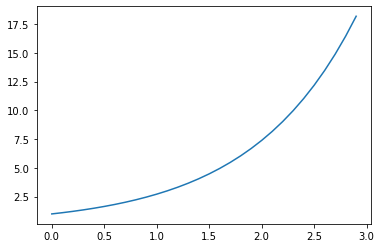

In [19]:
x_plot = np.arange(0, 3, 0.1)
plt.plot(x_plot, nd.array(x_plot).exp().asnumpy())

Matrix multiplication

In [20]:
nd.dot(x, y.T)


[[3.6315794 3.6315794]
 [3.3076792 3.3076792]]
<NDArray 2x2 @cpu(0)>

**Knowledge Check**

Select all valid NDArray operations (when `a` is an MXNet NDArray).
- [ ] `a.exp()`
- [ ] `mx.nd.exp(a)`
- [ ] `mx.nd(exp, a)`

Indexing

In [21]:
x[:, 1:3] # all row, first and second column


[[0.8472517 0.4236548]
 [0.6458941 0.3843817]]
<NDArray 2x2 @cpu(0)>

In [22]:
y[1:2, 0:2] = 100 # replace
y


[[  2.   2.   2.]
 [100. 100.   2.]]
<NDArray 2x3 @cpu(0)>

## Gluon Blocks

### Fundamental

In [23]:
import mxnet as mxnet
from mxnet import nd
from mxnet.gluon import nn

Block is the basic unit of neural network operation, manipulate data flowing through the network and hold onto parameters.

#### Convolutional 2D

**Convolutional 2D** is created using `.Conv2D()` method with the following parameters:
- `channels`: number of output channels
- `kernel_size`: matrix size of mask
- `in_channels`: number of input channels
- `strides`: how many cells move between patches
- `padding`: outer padding value
- `activation`: activation function to be applied after convolution operation

In [24]:
layer = nn.Conv2D(
    channels = 1,
    kernel_size = (3,3),
    in_channels = 1,
    strides = (1,1),
    padding = (0,0),
    activation = "relu",
    prefix = "conv_"
)
layer

Conv2D(1 -> 1, kernel_size=(3, 3), stride=(1, 1), Activation(relu))

Initialize kernel with Sobel operator to detect vertical lines.

$$
Sobel_{vertical} = 
\begin{bmatrix} 
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1 \\
\end{bmatrix}
$$

$$
Sobel_{horizontal} = 
\begin{bmatrix} 
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1 \\
\end{bmatrix}
$$

In [25]:
layer.initialize(mx.init.Constant([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]))

Apply Sobel filter to the image

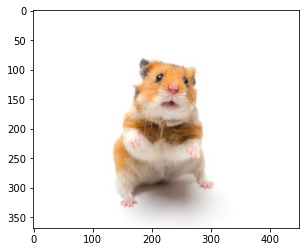

In [26]:
image_path = "assets/module4/dataset/hamster.jpg"
plt.imshow(plt.imread(image_path))

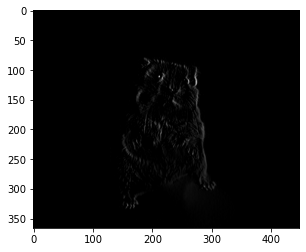

In [27]:
# load grayscale image in float32
image = mx.image.imread(image_path, 0).astype("float32")

# HWC to CHW
image_channel_first = image.transpose((2,0,1)) 

# CHW to NCHW
image_batch = image_channel_first.expand_dims(axis = 0)

# apply mask
output = layer(image_batch)
plt.imshow(output.squeeze().asnumpy(), cmap = "gray")

Parameters

In [28]:
layer.collect_params()
# shape: output_channel, input_channel, kernel size

conv_ (
  Parameter conv_weight (shape=(1, 1, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter conv_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [29]:
layer.weight.data()


[[[[-1.  0.  1.]
   [-2.  0.  2.]
   [-1.  0.  1.]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [30]:
layer.bias.data()


[0.]
<NDArray 1 @cpu(0)>

#### Max Pooling

**Max Pooling** reduces spatial resolution of a feature map by conserving the highest activations. Works by sliding a pooling window. Use `.MaxPool2D()` method with `pool_size` is the size of pooling mask.

In [31]:
layer = nn.MaxPool2D(pool_size = (4,4))
layer

MaxPool2D(size=(4, 4), stride=(4, 4), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)

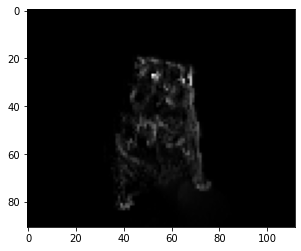

In [32]:
pooled = layer(output)
plt.imshow(pooled.squeeze().asnumpy(), cmap = "gray")

In [33]:
layer.collect_params()
# max pooling doesn't have parameters

pool0_ (

)

#### Dense Layer

**Dense layer** or fully connected layer performs matrix multiplication of input with weights and add bias to produce output. Use `.Dense()` method with the following parameters:
- `units`: number of output nodes
- `in_units`: number of input nodes
- `activation`: type of activation function to be applied after weighted sum

In [34]:
layer = nn.Dense(units = 10, in_units = 3, activation = "relu")
layer

Dense(3 -> 10, Activation(relu))

Let's initialize with all value with ones

In [35]:
layer.initialize(mx.init.One())

In [36]:
layer.weight.data()


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
<NDArray 10x3 @cpu(0)>

In [37]:
layer.bias.data()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<NDArray 10 @cpu(0)>

Try forward pass:

In [38]:
input_array = mx.nd.ones((1,3))
layer(input_array)


[[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]
<NDArray 1x10 @cpu(0)>

### Initialization

In [39]:
from mxnet import init

Default initial parameter:
- weight: random uniform from -0.07 to 0.07
- bias: 0

Different types of initialization:
- `init.Uniform`: sample from uniform distribution
- `init.Normal`: sample from normal distribution
- `init.Xavier`: keep the scale of gradients roughly the same in all layers. The range is between $-c$ and $c$ where $$c = \sqrt{\dfrac{magnitude}{0.5*(n_{in}+n_{out})}}$$
- `init.Zero`
- `init.One`
- `init.Constant`

In [40]:
layer = nn.Conv2D(channels = 1, in_channels = 1, kernel_size = (3,3))
layer.initialize(init.Xavier())
layer.weight.data()


[[[[-0.0720681  -0.23378688  0.45238042]
   [-0.51186377  0.53539157 -0.2625139 ]
   [-0.13459015 -0.0257901   0.33685505]]]]
<NDArray 1x1x3x3 @cpu(0)>

In [41]:
(3/(0.5*(9+9)))**0.5

0.5773502691896257

In [42]:
layer = nn.Conv2D(channels = 512, in_channels = 512, kernel_size = (3,3))
layer.initialize(init.Xavier())
layer.weight.data()


[[[[ 1.59302950e-02  1.47453696e-03 -1.02178566e-03]
   [ 3.47238407e-03 -5.47130220e-03  2.17186399e-02]
   [ 1.71504468e-02 -2.18904763e-02 -8.29784200e-03]]

  [[-2.10692212e-02  7.56136701e-03 -2.44837534e-02]
   [-6.72377087e-03  1.69739351e-02  2.33291015e-02]
   [ 1.41946264e-02 -1.83532722e-02  1.88821033e-02]]

  [[ 1.88859366e-02  2.44243890e-02 -1.34680793e-03]
   [ 1.52663738e-02  1.53557882e-02 -1.96574815e-03]
   [ 1.04498677e-03  1.43156946e-02  9.12841037e-03]]

  ...

  [[-1.89376064e-02  1.28414705e-02 -9.75750573e-03]
   [-2.14299243e-02 -1.48998201e-03 -9.34058800e-04]
   [ 9.85651091e-03 -2.77236477e-03  7.10726157e-03]]

  [[ 8.80146027e-03 -1.04310457e-02 -2.61599012e-03]
   [-7.73893669e-03  1.04263239e-02 -1.88280437e-02]
   [ 9.26955044e-03  7.56127760e-04  1.00606941e-02]]

  [[ 5.49796224e-03  6.05231896e-03 -1.50172953e-02]
   [-1.78108159e-02  2.51362585e-02  1.33090205e-02]
   [-1.82600357e-02  1.43420584e-02  1.11638010e-02]]]


 [[[-3.26624699e-03 -1.6

In [43]:
(3/(0.5*(512*9+512*9)))**0.5

0.02551551815399144

Deferred initialization: number of input in a layer is completed automatically during the first pass of data. Let's create a layer without defining the number of `in_channels`.

In [44]:
layer = nn.Conv2D(channels = 1, kernel_size = (3,3))
layer.weight
# in_channels is 0

Parameter conv2_weight (shape=(1, 0, 3, 3), dtype=<class 'numpy.float32'>)

In [45]:
layer.initialize(init.Xavier())
layer(mx.nd.ones((1,333,125,125)))
layer.weight
# in_channels is 333 just like the input

Parameter conv2_weight (shape=(1, 333, 3, 3), dtype=<class 'numpy.float32'>)

**Knowledge Check**

Why is initialization deferred until the first batch of data is passed into the network?
- [ ] So that layer parameter shapes don’t need to be explicitly defined beforehand.
- [ ] So that memory is not allocated until absolutely necessary.
- [ ] So that the model converges more reliably.
- [ ] So that the networks can support variable dimension input during inference.

**Initialization context**: if we initialize on one context, then the network is on that context.

Example: once we initialize on GPU, we have to forward pass the input on GPU.

In [46]:
layer = nn.Conv2D(channels = 1, kernel_size = (3,3))
layer.initialize(init.Xavier(), ctx = mx.gpu())

In [47]:
# layer(nd.ones((1, 5, 9, 9)))
# this is on CPU, error because the network is on GPU

In [48]:
layer(nd.ones((1, 5, 9, 9), ctx = mx.gpu()))


[[[[0.11921266 0.11921266 0.11921266 0.11921266 0.11921266 0.11921266
    0.11921266]
   [0.11921266 0.11921266 0.11921266 0.11921266 0.11921266 0.11921266
    0.11921266]
   [0.11921266 0.11921266 0.11921266 0.11921266 0.11921266 0.11921266
    0.11921266]
   [0.11921266 0.11921266 0.11921266 0.11921266 0.11921266 0.11921266
    0.11921266]
   [0.11921266 0.11921266 0.11921266 0.11921266 0.11921266 0.11921266
    0.11921266]
   [0.11921266 0.11921266 0.11921266 0.11921266 0.11921266 0.11921266
    0.11921266]
   [0.11921266 0.11921266 0.11921266 0.11921266 0.11921266 0.11921266
    0.11921266]]]]
<NDArray 1x1x7x7 @gpu(0)>

We can **manually** set parameters by `.set_data()` method

In [49]:
layer.weight.set_data(333*nd.ones((1,5,3,3), ctx = mx.gpu()))
layer.weight.data()


[[[[333. 333. 333.]
   [333. 333. 333.]
   [333. 333. 333.]]

  [[333. 333. 333.]
   [333. 333. 333.]
   [333. 333. 333.]]

  [[333. 333. 333.]
   [333. 333. 333.]
   [333. 333. 333.]]

  [[333. 333. 333.]
   [333. 333. 333.]
   [333. 333. 333.]]

  [[333. 333. 333.]
   [333. 333. 333.]
   [333. 333. 333.]]]]
<NDArray 1x5x3x3 @gpu(0)>

### Sequential Gluon Blocks

In [50]:
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn

The purpose of `.Sequential()` is to provide convenience to create sequential models by simply chaining the composition of each layer one after each other. This allows us to define models consisting of stacked layers.

Let's reproduce a simple LeNet architecture by Yann LeCun as follows:

<img src="assets/module4/lenet.png" width="500">

In [51]:
net = nn.Sequential()
net.add(
    nn.Conv2D(channels = 6, kernel_size = (5, 5), activation = 'tanh'),
    nn.MaxPool2D(pool_size = (2, 2)),
    nn.Conv2D(channels = 16, kernel_size = (5, 5), activation = 'tanh'),
    nn.MaxPool2D(pool_size = (2, 2)),
    nn.Dense(units = 120, activation = 'tanh'),
    nn.Dense(units = 84),
    nn.Dense(units = 10)
)
net

Sequential(
  (0): Conv2D(None -> 6, kernel_size=(5, 5), stride=(1, 1), Activation(tanh))
  (1): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (2): Conv2D(None -> 16, kernel_size=(5, 5), stride=(1, 1), Activation(tanh))
  (3): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
  (4): Dense(None -> 120, Activation(tanh))
  (5): Dense(None -> 84, linear)
  (6): Dense(None -> 10, linear)
)

We haven't specified the number of inputs, but Gluon can automatically infer the input size when the network receive the first batch of data.

In [52]:
net.initialize()

Forward pass

In [53]:
input_array = nd.ones((1, 1, 28, 28))
net(input_array)
net.forward(input_array) # equivalent


[[-0.00709328 -0.01215724  0.0301539   0.00152729 -0.01605038  0.01345255
   0.02641603 -0.01062098  0.01955106  0.00859926]]
<NDArray 1x10 @cpu(0)>

Another sequential models:

<img src="assets/module4/vgg16.png" width="300">

- Popular for image classification
- Drawback: large number of parameters

### Custom Gluon Blocks

Building more complex data flows using `nn.Block` as the parent class.

In [54]:
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn

Let's create multi layer perceptron or MLP class which inherit `nn.Block` consist of methods:
- `__init__`: constructor, define the architecture
- `forward`: describe data flow for forward pass

In [55]:
class MLP(nn.Block):
    def __init__(self, hidden_units = 256, **kwargs):
        # call the constructor of nn.Block to perform necessary initialization
        super(MLP, self).__init__(**kwargs)
        
        # hidden layer
        self.hidden = nn.Dense(hidden_units, activation = "relu")
        
        # output layer
        self.output = nn.Dense(10)
        
    def forward(self, x):
        y = self.hidden(x)
        return self.output(y)

In [56]:
net = MLP(hidden_units = 512)
net.initialize()
net(nd.random.uniform(shape = (1, 64)))


[[ 0.08633302  0.00977867  0.00338558 -0.1582361  -0.02137251  0.11280774
   0.18100005  0.0372853  -0.10333555 -0.2574899 ]]
<NDArray 1x10 @cpu(0)>

**Knowledge Check**

Which of the following options is true?
- [ ] You should define block metadata in the `__init__` method (e.g. block name, etc.) but define and use the layers of the network in the `forward` method.
- [ ] You should define the layers of the network in the `__init__` method and use them in the `forward` method.

Let's create another complex architecture: Siamese network for comparing two images.

<img src="assets/module4/siamese-network.png" width="400">

In [57]:
class SiameseNetwork(nn.Block):
    def __init__(self, hidden_units = 256, **kwargs):
        super(SiameseNetwork, self).__init__(**kwargs)
        self.mlp = nn.Sequential()
        with self.mlp.name_scope():
            self.mlp.add(
                nn.Dense(units = 128, activation = "relu"),
                nn.Dense(units = 128, activation = "relu"),
                nn.Dense(units = 128, activation = "relu")
            )
    
    def forward(self, x1, x2):
        y1 = self.mlp(x1).expand_dims(axis = 1) # N, 1, C
        y2 = self.mlp(x2).expand_dims(axis = 2) # N, C, 1
        return nd.batch_dot(y1, y2)
        

In [58]:
net = SiameseNetwork()
net.initialize()
x1 = nd.random.uniform(shape = (3,64))
x2 = nd.random.uniform(shape = (3,64))
net(x1, x2)


[[[0.02136999]]

 [[0.02208177]]

 [[0.02097865]]]
<NDArray 3x1x1 @cpu(0)>

### Visualization

In [59]:
import os
os.environ["PATH"] += os.pathsep + "C:\Program Files (x86)\Graphviz2.38\bin"

In [60]:
import mxnet as mx
from mxnet import nd, viz
from mxnet.gluon import nn, model_zoo

Let's use vgg11 pre-trained model:

In [61]:
vgg = model_zoo.vision.vgg11(pretrained = True)

Two main blocks of model: `features` and `output`

In [62]:
print(vgg)

VGG(
  (features): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Activation(relu)
    (2): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (3): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): Activation(relu)
    (5): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (6): Conv2D(128 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Activation(relu)
    (8): Conv2D(256 -> 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Activation(relu)
    (10): MaxPool2D(size=(2, 2), stride=(2, 2), padding=(0, 0), ceil_mode=False, global_pool=False, pool_type=max, layout=NCHW)
    (11): Conv2D(256 -> 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): Activation(relu)
    (13): Conv2D(512 -> 512, kernel_size=(3, 3), stride=(1

`.summary()` to see the data flows through the network at each layer.

In [64]:
vgg.summary(nd.ones((1, 3, 224, 224)))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                            (1, 3, 224, 224)               0
            Conv2D-1                           (1, 64, 224, 224)            1792
        Activation-2                           (1, 64, 224, 224)               0
         MaxPool2D-3                           (1, 64, 112, 112)               0
            Conv2D-4                          (1, 128, 112, 112)           73856
        Activation-5                          (1, 128, 112, 112)               0
         MaxPool2D-6                            (1, 128, 56, 56)               0
            Conv2D-7                            (1, 256, 56, 56)          295168
        Activation-8                            (1, 256, 56, 56)               0
            Conv2D-9                            (1, 256, 56, 56)          590080
       Activation-10        

**Knowledge Check**

Which of the following layer statistics are shown as part of the network `summary`?
- [ ] Shape of output
- [ ] Count of trainable parameters
- [ ] Memory consumption of parameters
- [ ] Shape of parameters

Visualize computational graph

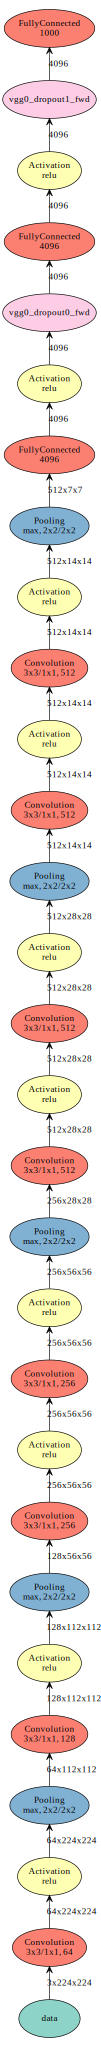

In [65]:
viz.plot_network(vgg(mx.sym.var('data')),
                 shape = {'data': (1, 3, 224, 224)},
                 node_attrs = {'shape': 'oval', 'fixedsize': 'false'})

Let's use mobilenet pre-trained model:

In [66]:
mobile_net = model_zoo.vision.mobilenet_v2_1_0(pretrained = True)
mobile_net

MobileNetV2(
  (features): HybridSequential(
    (0): Conv2D(3 -> 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
    (2): RELU6(
    
    )
    (3): LinearBottleneck(
      (out): HybridSequential(
        (0): Conv2D(32 -> 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
        (2): RELU6(
        
        )
        (3): Conv2D(1 -> 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=32)
        (5): RELU6(
        
        )
        (6): Conv2D(32 -> 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (7): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=16)

In [67]:
mobile_net.summary(nd.ones((1, 3, 224, 224)))

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                            (1, 3, 224, 224)               0
            Conv2D-1                           (1, 32, 112, 112)             864
         BatchNorm-2                           (1, 32, 112, 112)             128
             RELU6-3                           (1, 32, 112, 112)               0
            Conv2D-4                           (1, 32, 112, 112)            1024
         BatchNorm-5                           (1, 32, 112, 112)             128
             RELU6-6                           (1, 32, 112, 112)               0
            Conv2D-7                           (1, 32, 112, 112)             288
         BatchNorm-8                           (1, 32, 112, 112)             128
             RELU6-9                           (1, 32, 112, 112)               0
           Conv2D-10        

`mobilenet` have many layers than `vgg11` but with the same dimension of input, `mobilenet` have less number of trainable params than `vgg11`, making it more faster. 

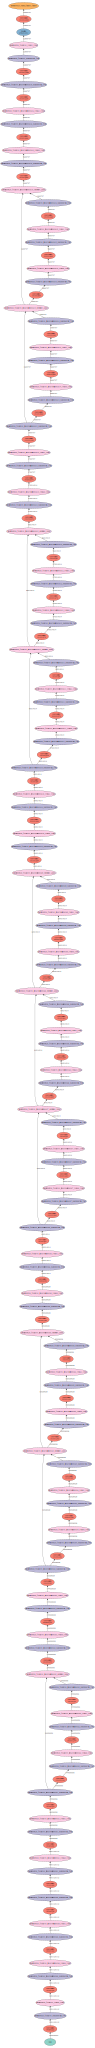

In [68]:
viz.plot_network(mobile_net(mx.sym.var('data')),
                 shape = {'data': (1, 3, 224, 224)},
                 node_attrs = {'shape': 'oval', 'fixedsize': 'false'})

The above computational graph is too complicated, instead we can export it and visualize it with http://lutzroeder.github.io/netron/ (upload `.json` file)

In [69]:
mobile_net.hybridize()
mobile_net(nd.ones((1, 3, 224, 224)))
mobile_net.export("scripts/mobile_net")

<img src="assets/module4/mobile-net-viz.png" width="750">

## Evaluation

Formal measures of how good or bad our models are.

Objective function: lower value is better. sometimes called as loss function. Example:

- Regression: sum of square errors
$$f=\sum{(y-\hat{y})^2}$$

- Classification: error rate
$$f = \frac{|y \neq \hat{y}|}{|y|}$$
Minimize False Positive and False Negative

Difference between loss and metric:

- Loss: direct cost objective to be minimized during training.

- Metric: human readable assessment, not used directly in the training.

### Metrics

Binary classification problem: confusion matrix

<img src="assets/module4/confusion-matrix.png" width="200">

$$Precision = \frac{TP}{TP+FP}$$

$$Recall = \frac{TP}{TP+FN}$$

$$Accuracy = \frac{TP + TN}{Total}$$

$$F1 = 2 \times \frac{Recall \times Precision}{Recall + Precision}$$

Use case:
- Detector for quality assurance on a production line: optimize Recall than Precision
- Build sensor that detects human on a camera feed to control outdoor lights: optimize Precision

**Knowledge Check**

A false negative is...
- [ ] a sample that has been incorrectly labelled as false.
- [ ] a sample that has been incorrectly labelled as true.
- [ ] a sample that has been correctly labelled as false.
- [ ] a sample that has been correctly labelled as true.

Regression

- Root Mean Squared Error (RMSE)

$$RMSE = \sqrt{\frac{\sum((Predicted-Actual)^2)}{N}}$$

- Mean Absolute Error (MAE)

$$MAE = \sum{\frac{|Predicted-Actual|}{N}}$$

In [70]:
import mxnet as mx
from mxnet import metric

Example on accuracy:

In [71]:
actual = nd.array([1,2,3])
predicted = nd.array([1,2,3])

acc = metric.Accuracy()
acc.update(actual, predicted)
acc.get()

('accuracy', 1.0)

In [72]:
acc.reset()

predicted_2 = nd.array([1,1,1])
acc.update(actual, predicted_2)
acc.get()

('accuracy', 0.3333333333333333)

Multi-class classification

In [73]:
top_2_acc = metric.TopKAccuracy(top_k = 2)
predicted = mx.nd.array([[0.4, 0.5, 0.1], [0.4, 0.5, 0.1], [0.4, 0.5, 0.1]])
actual = mx.nd.array([0, 0, 0])

# compare [1, 1, 1] with [0, 0, 0]
acc.reset()
acc.update(actual, predicted)
print(acc.get())

# compare [[0,1], [0,1], [0,1]] with [0, 0, 0]
top_2_acc.update(actual, predicted)
print(top_2_acc.get())

('accuracy', 0.0)
('top_k_accuracy_2', 1.0)


**Knowledge Check**

What is the correct flow for calculating accuracy using MXNet's `Accuracy` metric?
- [ ] ```
metric = mx.metric.Accuracy()
metric.update(preds = predicts, labels = labels)
print(metric.get()) ```

- [ ] ```
metric = mx.metric.Accuracy()
print(metric.evaluate(preds = predicts, labels = labels)) ```

Intersection Over Union (IoU):

<img src="assets/module4/iou.png" width="200">

Precision at 0.5: any correctly labeled class > 0.5 IoU overlap with actual bounding box is considered as a correct prediction.

### Losses

In [74]:
import mxnet as mx
from mxnet.gluon import loss
import numpy as np
import matplotlib.pyplot as plt

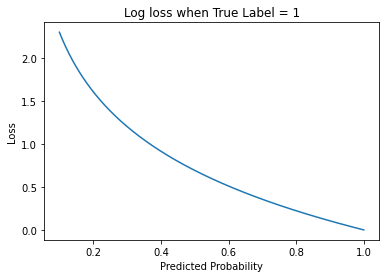

In [75]:
x = np.arange(0.1, 1, 0.001)

plt.plot(x, -np.log(x))

plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.title("Log loss when True Label = 1")
plt.show()

**Knowledge Check**

What is the advantage of a loss function (e.g. cross-entropy) compared to a metric (e.g. error rate)?
- [ ] It's differentiable.
- [ ] It's faster to compute.

$$Softmax(x_i) = \frac{e_{i}^x}{\sum{e_{j}^x}}$$

In [76]:
s = nd.array([[1,2,3,4,5]]).softmax()
s


[[0.01165623 0.03168492 0.08612854 0.23412167 0.6364086 ]]
<NDArray 1x5 @cpu(0)>

In [77]:
s.sum()


[1.]
<NDArray 1 @cpu(0)>

Cross Entropy Loss function:

$$loss = - \sum{p_i \times log(pred_i)}$$

In [78]:
predicted = nd.array([10,20,40,20,5])
actual = nd.array([1])

loss_fn = loss.SoftmaxCrossEntropyLoss()
loss_fn(predicted, actual)


[20.]
<NDArray 1 @cpu(0)>

In [79]:
actual = nd.array([2])
loss_fn(predicted, actual)


[0.]
<NDArray 1 @cpu(0)>

We can conclude if predicted == actual then loss is zero. The less, the better our model.

## Summary

1. N-dimensional array
    - scalar, vector, matrix, tensor
    - Apache MXNet has NDArray which is similar with Numpy array

2. Gluon blocks
    - Convolution, max pooling, dense layer
    - Utility blocks: Sequential blocks
    - Sub classes of the block class: custom blocks
    - Gluon models: model zoo pre-trained models
    - Visualize computational graph that represents data flows

3. Loss and metric
    - Loss: optimization objective to be minimized using gradient descent
    - Metric: human readable evaluation